# SLU09: Model Selection & Overfitting -- Exercises
---

*Exercises are graded unless otherwise indicated.*

In [6]:
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Data
For this exercise we will use the Boston House Prices dataset. Sklearn has it natively. For more information see: https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset

In [7]:
# Load data
boston_data = load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df_boston.shape

(506, 14)

Because this is just an exercise, we are going to assume we only have one feature to work with, **LSTAT** (% lower status of the population), and use it to try to predict **target** (median value of owner-occupied homes in thousands).

In [9]:
X = df_boston[['LSTAT']]
y = df_boston['target']

Let's quickly plot the data:

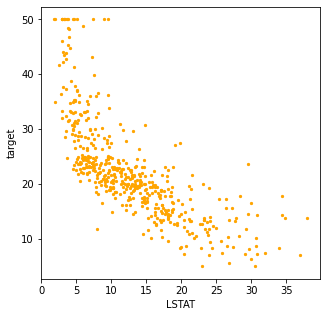

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(X, y, c='orange', s=5)
plt.xlabel('LSTAT')
plt.ylabel('target')
plt.show();

## Exercise 1: Train/validation/test split
Let's first split our data into train, validation, and test sets. Assume the validation and test sets are each **20%** of the full dataset. Use a **random state** of 42.

In [ ]:
# don't forget to import the function you need! 
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Split the data into train, validation, and test sets
# Don't forget to set random state to 42
# You should create variables named X_train, X_val, X_test, y_train, y_val, y_test
# There are several correct ways to do this, but to get the same answer as the autograder,
# follow the method that is in the learning notebook
# YOUR CODE HERE
X_train = X[:800]
X_val
X_test = X[800:]
y_train = X[:800]
y_val
y_test = X[800:]

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=1234)

In [ ]:
"""Check that the solution is correct."""

assert X_train.shape == (303, 1)
assert X_val.shape == (101, 1)
assert X_test.shape == (102, 1)
assert y_train.shape == (303,)
assert y_val.shape == (101,)
assert y_test.shape == (102,)
assert list(X_train.index[:10]) == [304, 83, 248, 165, 163, 199, 231, 74, 311, 455]
assert list(X_val.index[:10]) == [375, 332, 441, 5, 154, 218, 229, 181, 23, 26]
assert list(X_test.index[:10]) == [473, 500, 434, 381, 395, 390, 211, 175, 92, 144]
np.testing.assert_almost_equal(X_val.loc[272]['LSTAT'], 7.73, 2)

## Exercise 2: Train a baseline model
Let's train a baseline Linear Regression model on the train set and measure R2 and MSE on the validation set. Make sure you understand why we are only evaluating on the validation set and not the test set!

In [ ]:
# Initialize model
lr_baseline = LinearRegression()

In [ ]:
# Import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Fit the model to the training set and return MSE and r2 on the validation set
# mse_baseline_val = ...
# r2_baseline_val = 
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
"""Check that the solution is correct."""

np.testing.assert_almost_equal(mse_baseline_val, 33.4255, 2)
np.testing.assert_almost_equal(r2_baseline_val, 0.49178, 2)

Let's also check the same metrics on the train set

In [ ]:
# Use the fitted model to predict on the train set
# Return MSE and r2 on the train set
# mse_baseline_train = ...
# r2_baseline_train = 
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
"""Check that the solution is correct."""

np.testing.assert_almost_equal(mse_baseline_train, 38.8622, 2)
np.testing.assert_almost_equal(r2_baseline_train, 0.5645, 2)

Let's visualize the fitted regression as well:

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, c='orange', s=5)
plt.plot(X_train, lr_baseline.predict(X_train))
plt.xlabel('LSTAT')
plt.ylabel('target')
plt.show();

### Exercise 2A
Judging by the r2 and MSE of the train and validation sets, and the plot of the model's predictions, is this model more likely to be A) underfit or B) overfit? 

In [ ]:
# answer = 'A' or 'B'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert base64.b64encode(answer.encode()) == b'QQ=='

It definitely seems like this model has too much bias. It looks like the relationship between LSTAT and target is more of a curve, so let's try to make the model more flexible by creating polynomial features from LSTAT to hopefully better predict median home price.

## Exercise 3: Train a more complex model
Now train a Linear Regression model on the new training data with polynomial features and measure R2 and MSE on the train and validation sets. Don't forget that the validation set will need the same preprocessing that the training data had.

In [ ]:
from utils import expand_dataset

In [ ]:
# Preprocess data
X_train_poly = expand_dataset(X_train, 10, feature_name='LSTAT')
X_train_poly.head()

In [ ]:
# Initialize model
lr_poly = LinearRegression()

In [ ]:
# Fit the model to the train set with polynomial features
# Perform the same preprocessing on the validation set as the train set
# Return MSE and r2 on the train and validation sets
# mse_poly_train = ...
# r2_poly_train = 
# mse_poly_val = ...
# r2_poly_val = 
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
"""Check that the solution is correct."""

np.testing.assert_almost_equal(mse_poly_train, 26.5562, 1)
np.testing.assert_almost_equal(r2_poly_train, 0.7024, 1)
np.testing.assert_almost_equal(mse_poly_val, 25.9554, 1)
np.testing.assert_almost_equal(r2_poly_val, 0.6053, 1)

Let's visualize our new predictions

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, c='orange', s=5)
plt.scatter(X_train, lr_poly.predict(X_train_poly))
plt.xlabel('LSTAT')
plt.ylabel('target')
plt.show();

Validation R-squared increased to 0.61 over the baseline of 0.49, which isn't bad, but the curve of the predictions is quite squiggly! From the chart we can tell that this model is almost definitely overfitting.  We should generally strive to make our models interpretable, and there is no logical way to explain why median home prices would depend on the percentage lower status of the population according to such a complex function.

## Exercise 4: Regularization
Let's now try to reduce the complexity of our model by using regularization. For this exercise we will only focus on Ridge (L2) regularization, but Lasso and Elastic Net will work in a similar way.

### Exercise 4.1: L2 Loss
First manually calculate the L2 loss on the validation set of the lr_poly model we trained above.
Recall the L2 loss function:

$$J_{L_2} = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 + \lambda_2 \sum_{k=1}^K \beta_k^2$$


In [ ]:
def l2_loss(y, y_hat, betas, lamb):
    """
    Args: 
        y : numpy array with shape (num_observations,)
            The targets.
        y_hat : numpy array with shape (num_observations,)
            The predictions.
        betas : numpy array with shape (num_features+1,)
            The parameters of your regression model. 
            The first value is the intercept and the 
            remaining ones are the feature coefficients.
        lamb : float
            The strength of the L2 regularizer.
            
    Returns:
        L : float
    """
        
    # Compute the mean squared error loss part of the general loss function.
    # Hint: use can use the sklearn function here
    # mse = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Compute the L2 part of the general loss function.
    # l2 = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Compute the total loss by combining the parts.
    # L = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return L

In [ ]:
"""Check that the solution is correct."""

betas = np.append(lr_poly.intercept_, lr_poly.coef_)

lamb = 2
loss = l2_loss(y_val, y_pred_poly_val, betas, lamb)
np.testing.assert_almost_equal(loss, 742.9, 1)

lamb2 = 6
loss2 = l2_loss(y_val, y_pred_poly_val, betas, lamb2)
np.testing.assert_almost_equal(loss2, 2176.9, 1)

Nice, now we'll take a look at the coefficients of the lr_poly model:

In [ ]:
plt.plot(range(len(lr_poly.coef_)), [abs(coef) for coef in lr_poly.coef_], marker='o', markerfacecolor='r')
plt.xlabel('Polynomial degree')
plt.ylabel('Coef. magnitude')
plt.show();

### Exercise 4.2: Ridge
Let's see what happens to them when we use Ridge Regularization. We are going to tune the hyperparameter alpha (lambda). Fit Ridge linear models to the polynomial-feature training data using alphas of [0.01, 0.1, 1]. Use normalize=True. Return the best Ridge model.

In [ ]:
# import ... 
# YOUR CODE HERE
raise NotImplementedError()

# Iterate through the above choices for alpha. For each:
# instantiate an instance of sklearn's Ridge model
# use normalize=True
# calculate R2 of the validation set
# save the best Ridge model in the variable ridge_best
# also save the best r2 value
# ridge_best = ...
# r2_best = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
"""Check that the solution is correct."""

assert ridge_best.alpha == 0.01
np.testing.assert_almost_equal(np.sum(ridge_best.coef_), -1.8292, 1)
np.testing.assert_almost_equal(ridge_best.score(X_train_poly, y_train), 0.6498, 2)
np.testing.assert_almost_equal(ridge_best.score(X_val_poly, y_val), 0.5783, 2)
np.testing.assert_almost_equal(ridge_best.score(X_val_poly, y_val), r2_best, 3)

As you can see in the chart below, the coefficients are smaller than in the previous model.

In [ ]:
plt.plot(range(len(ridge_best.coef_)), [abs(coef) for coef in ridge_best.coef_], marker='o', markerfacecolor='r')
plt.xlabel('Polynomial degree')
plt.ylabel('Coef. magnitude')
plt.show();

And when we plot the predictions, the ridge ones do have a bit of a curve while the baseline prediction is a straight line.

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, c='orange', s=5)
plt.scatter(X_train, ridge_best.predict(X_train_poly))
plt.plot(X_train, lr_baseline.predict(X_train), c='green')
plt.xlabel('LSTAT')
plt.ylabel('target')
plt.show();

Let's summarize the results of our three models.

In [ ]:
clfs = {'baseline LR': lr_baseline, 'poly LR': lr_poly, 'best_ridge': ridge_best}
for key, clf in clfs.items():
    if key == 'baseline LR':
        y_train_pred_summary = clf.predict(X_train)
        y_val_pred_summary = clf.predict(X_val)
    else:
        y_train_pred_summary = clf.predict(X_train_poly)
        y_val_pred_summary = clf.predict(X_val_poly)
    
    train_r2 = r2_score(y_train, y_train_pred_summary)
    val_r2 = r2_score(y_val, y_val_pred_summary)
    
    print(f'---\n{key} R-squared:\nTrain: {train_r2:.2f} | Validation: {val_r2:.2f}')

### Exercise 4.3: Evaluate on test set
Finally, we're going to use the Ridge model to evaluate the MSE and R2 on the test set.

In [ ]:
# Predict the median house prices for the test set using the fitted best ridge model
# y_test_pred = ...
# Also calculate MSE and R2 for the test set
# mse_test = ...
# r2_test = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
"""Check that the solution is correct."""

np.testing.assert_almost_equal(mse_test, 33.2675, 2)
np.testing.assert_almost_equal(r2_test, 0.6126, 2)

The test R-squared is pretty similar to what we were getting on the validation set. But since the dataset is very small and we are only using one feature, there is still a lot of **irreducible error**. But hopefully from this exercise you understand more about how to properly evaluate your models and to check for overfitting.

## Exercise 5: Implementing K-fold cross-validation

As a last exercise, we are going to try to take advantage of as much data as possible and use k-fold cross validation to approximate our OSE. 

Use sklearn's cross_val_score on the full dataset (still using only the LSTAT feature) to compute the mean MSE and R2 on 5 folds.

In [ ]:
# You will need this
from sklearn.metrics import make_scorer
mse_scorer = make_scorer(mean_squared_error)

In [ ]:
# Don't forget to import the function you need!
# YOUR CODE HERE
raise NotImplementedError()

# Initialize model, use the settings of the best ridge model from before
# ridge_cv = ...
# YOUR CODE HERE
raise NotImplementedError()

# perform 5-fold cross validation on the full dataset (X and y)
# don't forget preprocessing
# store the mean cross val scores as mse_cv and r2_cv
# mse_cv = ...
# r2_cv = ...

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
np.testing.assert_almost_equal(r2_cv, 0.4254, 2)
np.testing.assert_almost_equal(mse_cv, 35.0995, 2)

With cross-validation, the mean R-squared is actually a lot lower than what we had before, suggesting that this value is a truer approximation of our performance on unseen data, and in our previous exercise we happened to be working with a "lucky" split of the data. This is just one reason why proper model evaluation is important!